In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import visualization_functions as vf
from mesamodel import World

import networkx as nx

## Section 1: Show that severance costs affect how the network converges, but not the equilibrium state

### Hint
Start with 0 severance costs and show that the network converges and is pairwise stable.
Then use the resulting network `World.net` and initialise a new world with severance costs using the stable network as the initial network.

In [2]:
world = World(
    num_agents=25,
    cost=0.25,
    severance_cost=0,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=True,
    max_steps=100,
    update_type="best_choice",
)

/Users/lucaverginer/mambaforge/envs/edc/lib/python3.11/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


In [3]:
# world.random.seed(2)
world.run_model()
world.is_pairwise_stable()

True

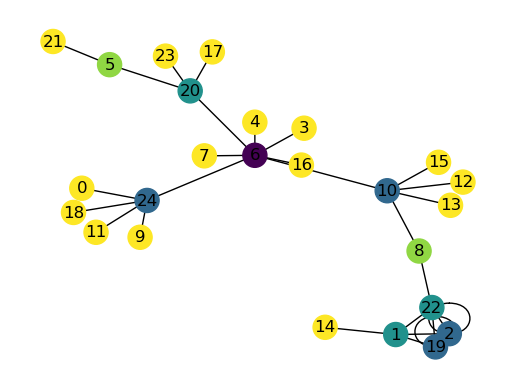

In [12]:
vf.plot_network(world)

In [13]:
world.severance_cost = 0.1
world.run_model()
world.is_pairwise_stable()

True

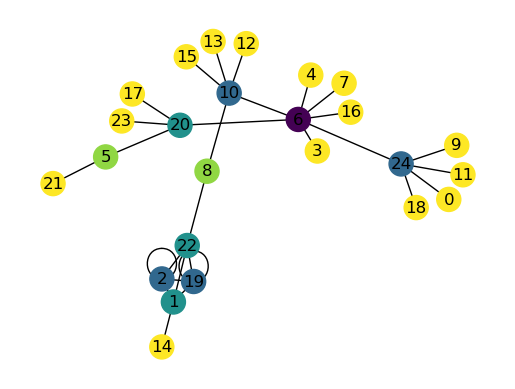

In [14]:
vf.plot_network(world)

## Section 2: Show differences in utility due to network position

Show that the position of an agent in the network affects their utility from a change, despite all agents in the same component having the same utiliy. 

### Hint
To do this, you will need to provide explicitly a network to the `World` class.
You can this as follows:

In [7]:
example_world = World(
    num_agents=5,
    cost=0.25,
    severance_cost=0.1,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=False,
    max_steps=100,
    update_type="best_choice",
)

# create a network with 5 agents in a chain
example_world.net.add_edge(0, 1)
example_world.net.add_edge(1, 2)
example_world.net.add_edge(2, 3)
example_world.net.add_edge(3, 4)

In [8]:
def agent_utility(agent):
    change_in_utility = []
    utility_before = agent.utility(agent.subgraph())
    neighbors = [a for a in agent.neighbors()]
    for other_agent in neighbors:
        potential_subgraph = agent.subgraph_if(remove_link_to=other_agent)
        new_utility = agent.utility(potential_subgraph)
        delta_utility = new_utility - utility_before
        change_in_utility.append(delta_utility)
    return change_in_utility

**Question 1:** In this network, what is the benefit of agent 1 to deleting a link to agent 2? And what is the benefit of agent 2 to deleting a link to agent 1? Why the difference? (Note agents are 0-indexed)

**Answer 1:**

In [9]:
print(agent_utility(example_world.schedule.agents[1]))
print(agent_utility(example_world.schedule.agents[2]))

[0.1359831811810137, -0.4820508075688805]
[-0.0678372451957856, -0.0678372451957856]


**Question 2:** Define a network where the benefit of deleting a link is the same for all agents.

In [10]:
example_world = World(
    num_agents=9,
    cost=0.25,
    severance_cost=0.1,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=False,
    max_steps=100,
    update_type="best_choice",
)



regular_grid = nx.grid_graph([3, 3], periodic=True)
# rename nodes to integers from 0 to 8
mapping = {node: i for i, node in enumerate(regular_grid.nodes)}
regular_grid = nx.relabel_nodes(regular_grid, mapping)
example_world.net = regular_grid

example_world.net.edges()

print(agent_utility(example_world.schedule.agents[1]))
print(agent_utility(example_world.schedule.agents[2]))

[0.07008937437478302, 0.07008937437478924, 0.07008937437478835, 0.07008937437478968]
[0.07008937437479146, 0.07008937437479101, 0.0700893743747879, 0.07008937437478968]


**Question 3:** Define a network where the benefit of deleting a link is the different for all agents (different from the network in Question 1). What is the fundamental reason for this difference?

In [11]:
example_world = World(
    num_agents=9,
    cost=0.25,
    severance_cost=0.1,
    deletion_prob=0,
    mutual_create=True,
    mutual_delete=False,
    max_steps=100,
    update_type="best_choice",
)



irregular_grid = nx.random_regular_graph(4, 9)
example_world.net = irregular_grid

example_world.net.edges()

print(agent_utility(example_world.schedule.agents[1]))
print(agent_utility(example_world.schedule.agents[2]))

[0.06773413999477818, 0.06974833786946233, 0.069748337869465, 0.0677341399947804]
[0.06974833786946455, 0.06974833786946455, 0.06773413999478262, 0.06773413999478128]
